/var/folders/ss/kzr14dns2k98hkq_7sxy__480000gn/T/ipykernel_2335/3694317515.py:32: RuntimeWarning: divide by zero encountered in divide
  f_x = (nw / na) * (cos_b / cos_a)


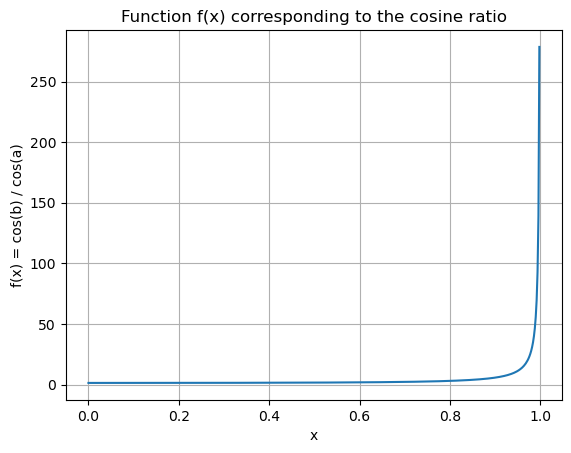

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_proportion(pro,na = 1,nw = 1.33):
    # 计算角度a
    a_deg = 20 + 30 * pro
    a_rad = np.radians(a_deg)

    # 计算余弦比值f(x)
    sin_a = np.sin(a_rad)
    sin_b = (sin_a * na) / nw 
    cos_a = np.sqrt(1 - sin_a**2)
    cos_b = np.sqrt(1 - sin_b**2)
    f_x = (nw / na) * cos_b / cos_a
    return f_x
    
na = 1
nw = 1.33
# 定义x的范围
x = np.linspace(0, 1, 500)

# 计算角度a(20-50)
a_deg = 0 + 90 * x
a_rad = np.radians(a_deg)

# 计算余弦比值f(x)
sin_a = np.sin(a_rad)
sin_b = (sin_a * na) / nw
cos_a = np.sqrt(1 - sin_a**2)
cos_b = np.sqrt(1 - sin_b**2)
f_x = (nw / na) * (cos_b / cos_a)

# 绘制图像
plt.plot(x, f_x)
plt.xlabel('x')
plt.ylabel('f(x) = cos(b) / cos(a)')
plt.title('Function f(x) corresponding to the cosine ratio')
plt.grid(True)
plt.show()

a_deg = 90
print()


In [ ]:
import cv2
import numpy as np

def refraction_correction(image, water_line, dis, n1=1.0, n2=1.33):
    """
    对图像中水下部分进行折射矫正
    :param image: 输入图像
    :param water_line: 水面的垂直位置（y 坐标）
    :param n1: 空气的折射率
    :param n2: 水的折射率
    :return: 矫正后的图像
    """
    height, width, _ = image.shape
    final_image = image[:water_line,:]
    dis_pixel = (int)(height * dis)

    print("height,", height)
    for y in range(water_line, height, dis_pixel):
        pro = calculate_proportion((y + (dis_pixel / 2) - water_line)/water_line,n2/n1)

        bottom_part = image[y:y+dis_pixel,:]
    
        # print("int pro", (int)(pro))
        stretched_bottom = cv2.resize(bottom_part,(width,(int)(dis_pixel*pro)),interpolation=cv2.INTER_LINEAR)

        # 拼接上半部分和拉伸后的下半部分
        final_image = np.vstack((final_image, stretched_bottom))

        # for x in range(width):
        #     # # 计算入射角（假设水面与视线垂直）
        #     # theta1 = np.arctan((y - water_line) / width)

        #     # # 使用 Snell 定律计算折射角，并确保输入值在 [-1, 1] 范围内
        #     # sin_theta2_input = np.clip(n1 / n2 * np.sin(theta1), -1, 1)
        #     # theta2 = np.arcsin(sin_theta2_input)

        #     # # 检查是否计算出了 NaN 或无效的 theta2
        #     # if np.isnan(theta2) or theta2 == 0:
        #     #     continue

            
            
        #     # 计算校正后的 y 坐标
        #     # corrected_y = water_line + (y - water_line) / np.tan(theta2)
        #     corrected_y = water_line + (y - water_line) * pro * n2
        #     print(pro)
        #     # 检查 corrected_y 是否为 NaN 或无效值
        #     if np.isnan(corrected_y) or corrected_y < 0 or corrected_y >= height:
        #         continue

        #     corrected_y = int(corrected_y)
        #     print(corrected_y)
        #     # 更新图像像素
        #     corrected_image[corrected_y, x] = image[y, x]

    return final_image


In [19]:
# 加载图像
image_path = '/home/sparkle79/Documents/cut/imgs/v5_1/000010.jpg'
image = cv2.imread(image_path)

height, width, _ = image.shape
corrected_image = image.copy()
print("height,", height)
print("water_line,", image.shape[0] * 0.35)

height, 1080
water_line, 378.0


In [24]:
# 假设水面位置为图像的中部
water_line = image.shape[0] * 0.35
# 进行折射矫正
corrected_image = refraction_correction(image, (int)(water_line), 0.001)

# 显示和保存结果
# cv2.imshow('Corrected Image', corrected_image)
cv2.imwrite('corrected_image_0001.jpg', corrected_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print("ori pic size:", image.shape)
print("aft pic size:", corrected_image.shape)

height, 1080
ori pic size: (1080, 1920, 3)
aft pic size: (1163, 1920, 3)
